In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load data
data = pd.read_csv(r'C:\Users\student\Downloads\titanic.csv')



In [4]:
# Step 2: Handle missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Step 3: Drop unnecessary columns
data = data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# Step 4: One-hot encode categorical features
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)




In [5]:
# Step 5: Define features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Step 6: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [6]:
# Step 8: Train SVC model
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = svc.predict(X_test)



In [7]:
# Step 10: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



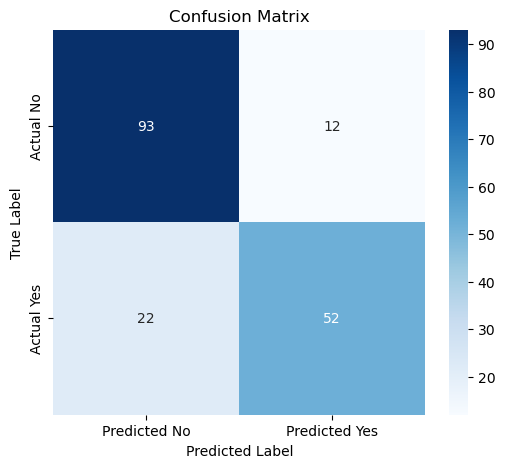

In [8]:
# Step 11: Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()